Video 13.1
https://www.youtube.com/watch?v=kIGHE7Cfe1s

Video 13.2
https://www.youtube.com/watch?v=Rm9bJcDd1KU

Video 13.3
https://youtu.be/6HjZk-3LsjE

In [289]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
    
import numpy as np

import matplotlib.pyplot as  plt
%matplotlib inline

from skimage.util import random_noise

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

## Assignment
### 1. change the `encoding_dim` through various values (`range(2,18,2)` and store or keep track of the best loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot

In [135]:
import pandas as pd
import numpy as np

In [136]:
model_loss = pd.DataFrame(index= range(2,18,2), 
                         columns = ["loss"])

#### for loop to run model through difference dimensions

In [139]:
for encoding_dim in range(2,18,2):
    # this is our input placeholder
    x = input_img = Input(shape=(784,))
    
    # "encoded" is the encoded representation of the input
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)
    
    # "decoded" is the lossy reconstruction of the input
    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)

    # this model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)

    # create a placeholder for an encoded (32-dimensional) input
    encoded_input = Input(shape=(encoding_dim,))
   
    # retrieve the last layer of the autoencoder model
    dcd1 = autoencoder.layers[-1]
    dcd2 = autoencoder.layers[-2]
    dcd3 = autoencoder.layers[-3]

    # create the decoder model
    decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    autoencoder.fit(xtrain, xtrain,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])                
               )
    model_loss.loc[encoding_dim,'loss'] = autoencoder.evaluate(xtest, xtest)
    

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.3495 - val_loss: 0.2644
Epoch 2/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.2589 - val_loss: 0.2548
Epoch 3/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.2487 - val_loss: 0.2429
Epoch 4/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.2406 - val_loss: 0.2389
Epoch 5/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.2381 - val_loss: 0.2367
Epoch 6/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.2365 - val_loss: 0.2348
Epoch 7/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.2347 - val_loss: 0.2337
Epoch 8/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.2330 - val_loss: 0.2319
Epoch 9/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.2316 - val_loss: 0.2

60000/60000 [==============================] - 6s 96us/step - loss: 0.1663 - val_loss: 0.1639
Epoch 15/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.1635 - val_loss: 0.1613
Epoch 16/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.1608 - val_loss: 0.1592
Epoch 17/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.1589 - val_loss: 0.1585
Epoch 18/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.1571 - val_loss: 0.1555
Epoch 19/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.1555 - val_loss: 0.1536
Epoch 20/20
10000/10000 [==============================] - 1s 62us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.3623 - val_loss: 0.2638
Epoch 2/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.2582 - val_loss: 0.2542
Epoch 3/20
60000/60000 [================

60000/60000 [==============================] - 6s 97us/step - loss: 0.1837 - val_loss: 0.1789
Epoch 8/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.1767 - val_loss: 0.1717
Epoch 9/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.1703 - val_loss: 0.1644
Epoch 10/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.1652 - val_loss: 0.1633
Epoch 11/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.1613 - val_loss: 0.1574
Epoch 12/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.1577 - val_loss: 0.1537
Epoch 13/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.1542 - val_loss: 0.1516
Epoch 14/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.1513 - val_loss: 0.1480
Epoch 15/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.1485 - val_loss: 0.1454
Epoch 16/20
60000/60000 [==============================] - 

In [143]:
model_loss

,loss
2,0.219122
4,0.177323
6,0.194408
8,0.152772
10,0.142708
12,0.142172
14,0.138886
16,0.136758


#### Plot loss

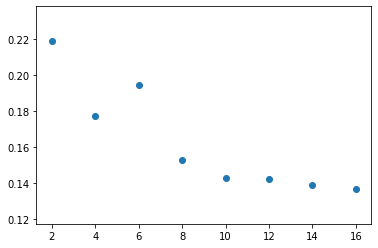

In [144]:
plt.scatter(model_loss.index, model_loss.loss)

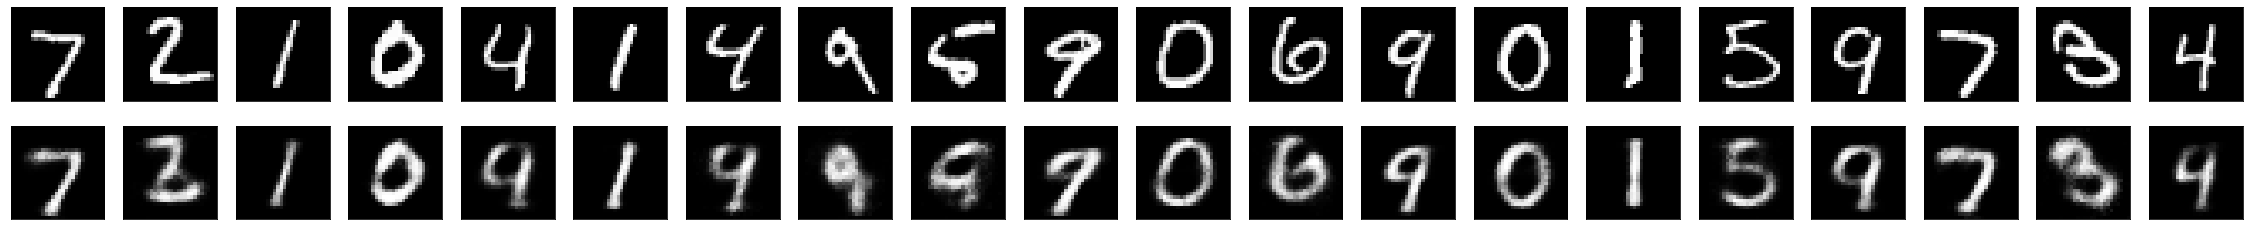

In [148]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 2. using the previous assignment's model of detecting images, how does the accuracy change when you run the digit-prediction model on these 'decoded' values?

#### Set-up and run NN model from last week

In [150]:
batch_size = 128
num_classes = 10
epochs = 10

In [174]:
print(xtrain.shape[0], 'train samples')
print(xtest.shape[0], 'test samples')

ytrain = keras.utils.to_categorical(ytrain, num_classes)
ytest = keras.utils.to_categorical(ytest, num_classes)

60000 train samples
10000 test samples


In [181]:
model_mlnn = Sequential()
model_mlnn.add(Dense(512, activation='relu', input_shape=(784,)))
model_mlnn.add(Dropout(0.2))
model_mlnn.add(Dense(512, activation='relu'))
model_mlnn.add(Dropout(0.2))
model_mlnn.add(Dense(10, activation='softmax'))

model_mlnn.summary()

model_mlnn.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_mlnn = model_mlnn.fit(xtrain, ytrain,
                    batch_size=128,
                    epochs=20,
                    verbose=1,
                    validation_data=(decoded_imgs, ytest))

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_210 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_37 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_211 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_38 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_212 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 13

#### Print Model Results

In [183]:
score_mlnn = model_mlnn.evaluate(decoded_imgs, ytest, verbose=0)
print('MLNN Test loss:', score_mlnn[0])
print('MLNN Test accuracy:', score_mlnn[1])

MLNN Test loss: 0.8780642637611774
MLNN Test accuracy: 0.8873999714851379


### 3. apply noise to *_only_* the input of the autoencoder (not the output). demonstrate that your autoencoder can strip out noise.

#### Model

In [386]:
encoding_dim = 16  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)

# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [392]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

#### Add Noise

In [393]:
xtrain_noise_10 = xtrain + np.random.normal(0, .1, xtrain.shape)
xtest_noise_10 = xtest + np.random.normal(0, .1, xtest.shape)

In [394]:
xtrain_noise_25 = xtrain + np.random.normal(0, .25, xtrain.shape)
xtest_noise_25 = xtest + np.random.normal(0, .25, xtest.shape)

In [395]:
xtrain_noise_50 = xtrain + np.random.normal(0, .5, xtrain.shape)
xtest_noise_50 = xtest + np.random.normal(0, .5, xtest.shape)

In [408]:
xtrain_noise_75 = xtrain + np.random.normal(0, .75, xtrain.shape)
xtest_noise_75 = xtest + np.random.normal(0, .75, xtest.shape)

In [412]:
xtrain_noise_95 = xtrain + np.random.normal(0, .95, xtrain.shape)
xtest_noise_95 = xtest + np.random.normal(0, .95, xtest.shape)

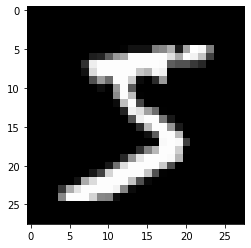

In [398]:
plt.imshow(xtrain[0].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

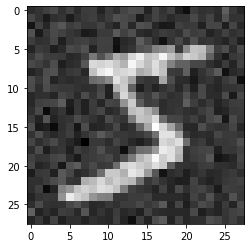

In [399]:
plt.imshow(xtrain_noise_10[0].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

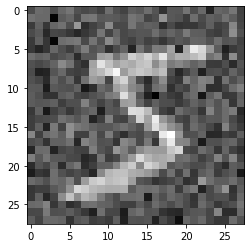

In [400]:
plt.imshow(xtrain_noise_25[0].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

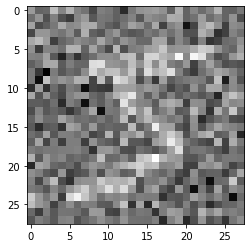

In [401]:
plt.imshow(xtrain_noise_50[0].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

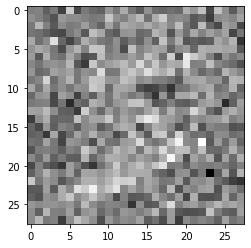

In [409]:
plt.imshow(xtrain_noise_75[0].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

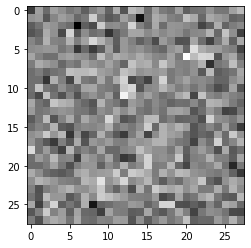

In [413]:
plt.imshow(xtrain_noise_95[0].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

####   Run Models and Display Results

##### .10 noise

In [402]:
autoencoder.fit(xtrain_noise_10, xtrain,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest_noise_10, xtest),
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])                
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.1735 - val_loss: 0.1685
Epoch 2/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.1680 - val_loss: 0.1639
Epoch 3/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.1630 - val_loss: 0.1589
Epoch 4/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.1590 - val_loss: 0.1556
Epoch 5/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.1552 - val_loss: 0.1549
Epoch 6/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.1523 - val_loss: 0.1487
Epoch 7/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.1493 - val_loss: 0.1476
Epoch 8/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.1469 - val_loss: 0.1451
Epoch 9/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.1446 - val_loss: 0.1408

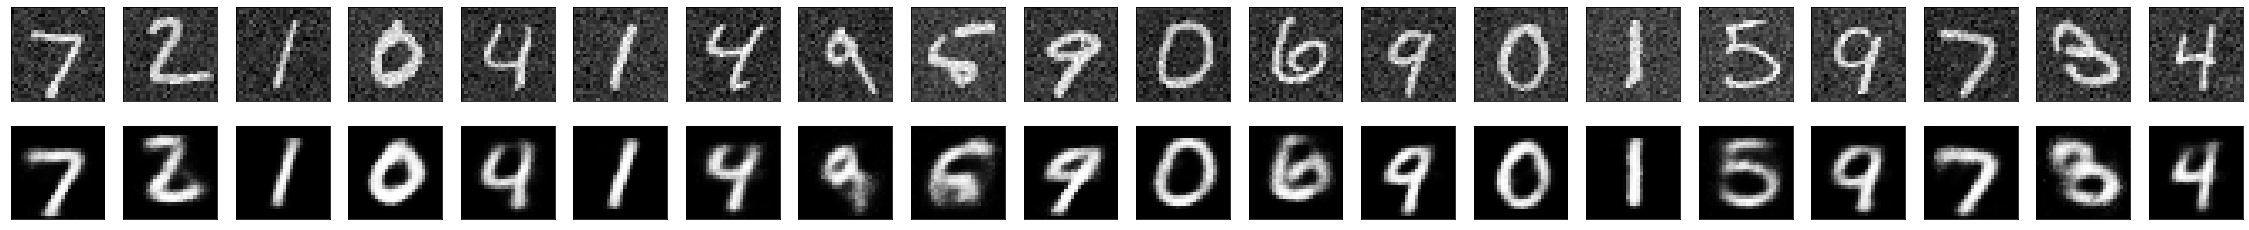

In [405]:
encoded_imgs = encoder.predict(xtest_noise_10)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest_noise_10[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



plt.show()

##### .25 noise

In [403]:
autoencoder.fit(xtrain_noise_25, xtrain,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest_noise_25, xtest),
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])                
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.1441 - val_loss: 0.1421
Epoch 2/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.1425 - val_loss: 0.1399
Epoch 3/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.1409 - val_loss: 0.1407
Epoch 4/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.1394 - val_loss: 0.1368
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.1379 - val_loss: 0.1371
Epoch 6/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.1364 - val_loss: 0.1343
Epoch 7/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.1351 - val_loss: 0.1333
Epoch 8/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.1338 - val_loss: 0.1306
Epoch 9/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.1327 - val_loss: 0.1320
Epoch

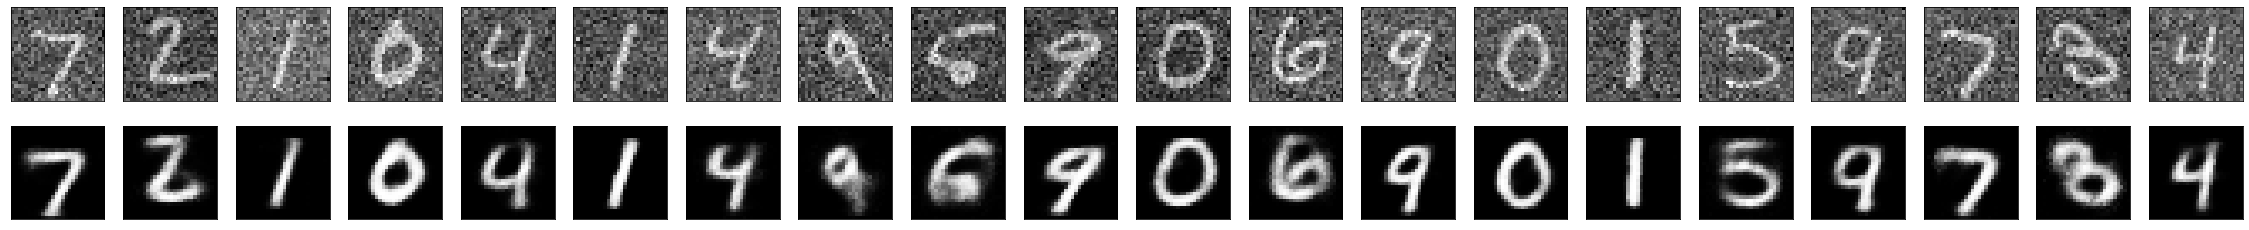

In [406]:
encoded_imgs = encoder.predict(xtest_noise_25)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest_noise_25[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



plt.show()

##### .5 noise

In [404]:
autoencoder.fit(xtrain_noise_50, xtrain,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest_noise_50, xtest),
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])                
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.1450 - val_loss: 0.1416
Epoch 2/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.1430 - val_loss: 0.1414
Epoch 3/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.1416 - val_loss: 0.1398
Epoch 4/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.1408 - val_loss: 0.1394
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.1400 - val_loss: 0.1387
Epoch 6/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.1392 - val_loss: 0.1383
Epoch 7/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.1386 - val_loss: 0.1383
Epoch 8/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.1379 - val_loss: 0.1375
Epoch 9/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.1372 - val_loss: 0.1377
Epoch

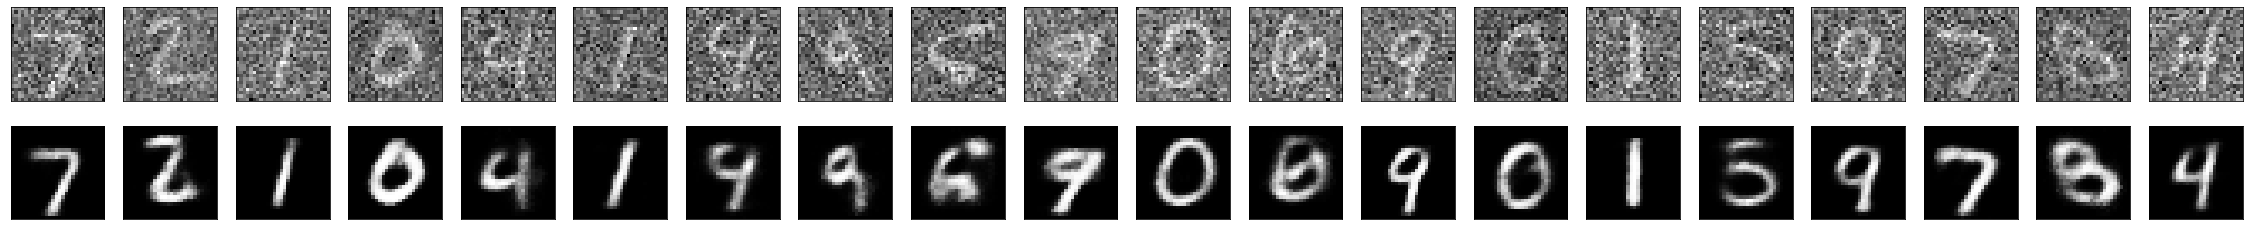

In [407]:
encoded_imgs = encoder.predict(xtest_noise_50)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest_noise_50[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



plt.show()

##### .75 noise

In [410]:
autoencoder.fit(xtrain_noise_75, xtrain,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest_noise_75, xtest),
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])                
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.1538 - val_loss: 0.1520
Epoch 2/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.1517 - val_loss: 0.1512
Epoch 3/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.1506 - val_loss: 0.1495
Epoch 4/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.1497 - val_loss: 0.1505
Epoch 5/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.1490 - val_loss: 0.1493
Epoch 6/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.1483 - val_loss: 0.1493
Epoch 7/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.1478 - val_loss: 0.1481
Epoch 8/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.1471 - val_loss: 0.1491
Epoch 9/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.1465 - val_loss: 0.1475
Ep

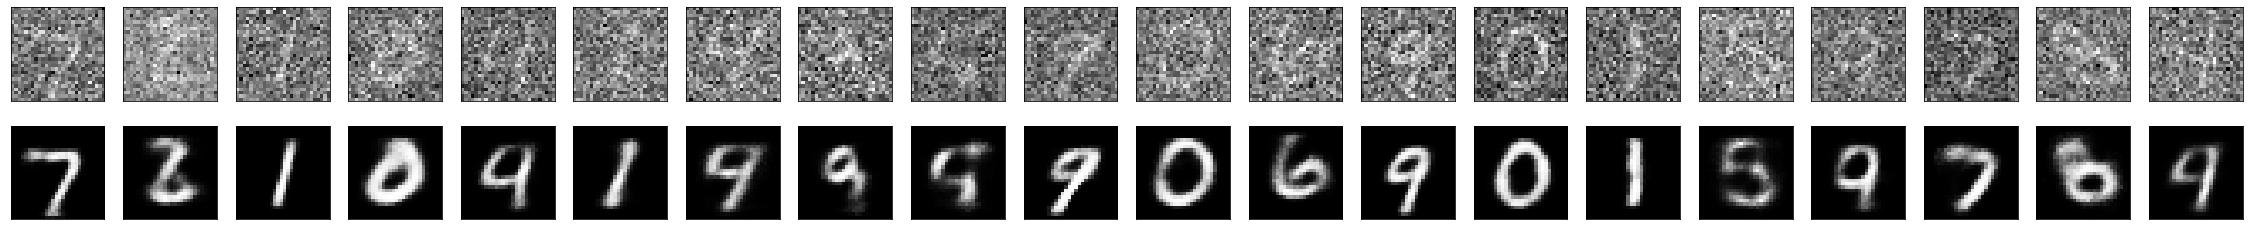

In [411]:
encoded_imgs = encoder.predict(xtest_noise_75)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest_noise_75[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



plt.show()

##### .95 noise

In [414]:
autoencoder.fit(xtrain_noise_95, xtrain,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest_noise_95, xtest),
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])                
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.1616 - val_loss: 0.1592
Epoch 2/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.1598 - val_loss: 0.1586
Epoch 3/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.1587 - val_loss: 0.1591
Epoch 4/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.1579 - val_loss: 0.1588
Epoch 5/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.1571 - val_loss: 0.1578
Epoch 6/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.1564 - val_loss: 0.1580
Epoch 7/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.1557 - val_loss: 0.1576
Epoch 8/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.1552 - val_loss: 0.1570
Epoch 9/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.1546 - val_loss: 0.1563


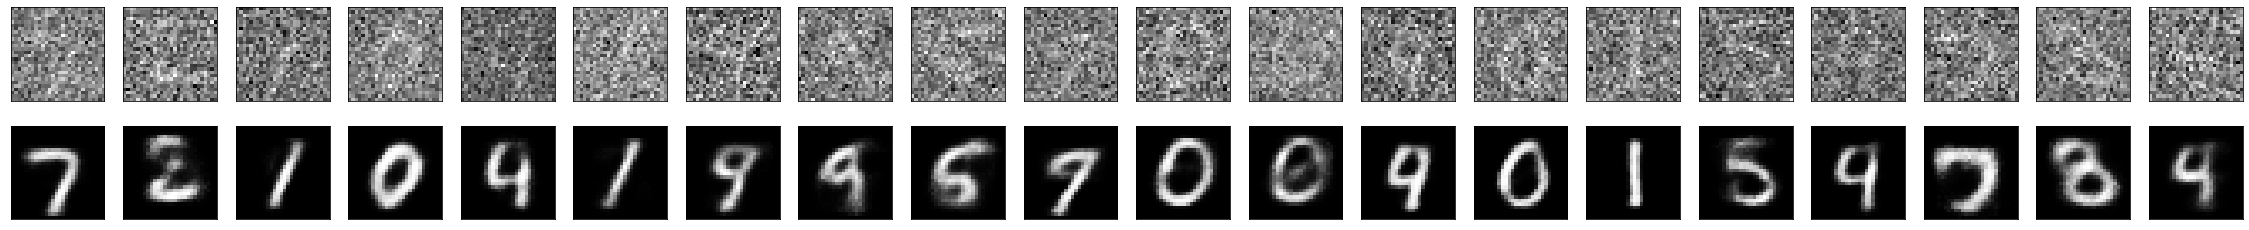

In [415]:
encoded_imgs = encoder.predict(xtest_noise_95)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest_noise_95[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



plt.show()